Train on 1 samples
Epoch 1/10
1/1 [==============================] - 5s 5s/sample - loss: 0.5986 - accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 5s 5s/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 5s 5s/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 5s 5s/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 5s 5s/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 5s 5s/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 5s 5s/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 5s 5s/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 5s 5s/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 5s 5s/sample - loss: 0.00

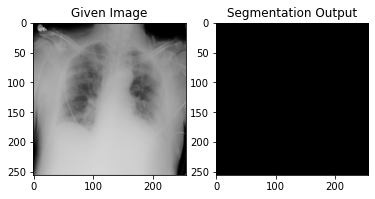

In [4]:
import tensorflow as tf
from tensorflow.keras import layers
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the UNet model
def unet_model(input_size):
    inputs = tf.keras.Input(input_size)

    # Contracting path
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool1)
    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool2)
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool3)
    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv4)
    drop4 = layers.Dropout(0.5)(conv4)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(drop4)

    # Bottom
    conv5 = layers.Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool4)
    conv5 = layers.Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv5)
    drop5 = layers.Dropout(0.5)(conv5)

    # Expansive path
    up6 = layers.Conv2D(512, 2, activation='relu', padding='same', kernel_initializer='he_normal')(layers.UpSampling2D(size=(2, 2))(drop5))
    merge6 = layers.concatenate([drop4, up6], axis=3)
    conv6 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge6)
    conv6 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv6)

    up7 = layers.Conv2D(256, 2, activation='relu', padding='same', kernel_initializer='he_normal')(layers.UpSampling2D(size=(2, 2))(conv6))
    merge7 = layers.concatenate([conv3, up7], axis=3)
    conv7 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge7)
    conv7 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv7)

    up8 = layers.Conv2D(128, 2, activation='relu', padding='same', kernel_initializer='he_normal')(layers.UpSampling2D(size=(2, 2))(conv7))
    merge8 = layers.concatenate([conv2, up8], axis=3)
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge8)
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv8)

    up9 = layers.Conv2D(64, 2, activation='relu', padding='same', kernel_initializer='he_normal')(layers.UpSampling2D(size=(2, 2))(conv8))
    merge9 = layers.concatenate([conv1, up9], axis=3)
    conv9 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge9)
    conv9 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)
    conv9 = layers.Conv2D(2, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)

    # Output
    output = layers.Conv2D(1, 1, activation='sigmoid')(conv9)

    model = tf.keras.Model(inputs=inputs, outputs=output)

    return model

# Load the image
img = cv2.imread('../Dataset/masked/COVID-19_Radiography_Dataset/Bacterial/images/COVID-1.png')
mask_img = cv2.imread('../Dataset/masked/COVID-19_Radiography_Dataset/Bacterial/masks/COVID-1.png')

# Preprocess the image
# ...

# Convert the image to the input format
img = cv2.resize(img, (256, 256))
img = np.expand_dims(img, axis=0)
img = img / 255.0

# Define the model
model = unet_model(input_size=(256, 256, 3))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
mask = np.zeros((1, 256, 256, 1))
model.fit(x=img, y=mask, batch_size=1, epochs=10)

# Make the segmentation
mask = model.predict(img)

# Visualize the segmentation
plt.subplot(1, 2, 1)
plt.imshow(img[0])
plt.title('Given Image')

plt.subplot(1, 2, 2)
plt.imshow(mask[0, :, :, 0], cmap='gray')
plt.title('Segmentation Output')

plt.show()


Train on 1 samples
Epoch 1/10
1/1 [==============================] - 6s 6s/sample - loss: 0.3248 - accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 5s 5s/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 4s 4s/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 5s 5s/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 5s 5s/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 5s 5s/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 4s 4s/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 4s 4s/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 4s 4s/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 4s 4s/sample - loss: 0.00

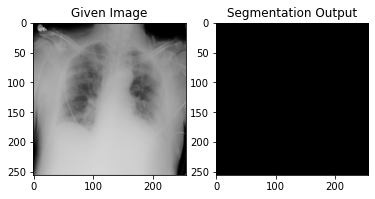

In [5]:
import tensorflow as tf
from tensorflow.keras import layers
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the UNet model
def unet_model(input_size):
    inputs = tf.keras.Input(input_size)

    # Contracting path
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool1)
    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool2)
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool3)
    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv4)
    drop4 = layers.Dropout(0.5)(conv4)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(drop4)

    # Bottom
    conv5 = layers.Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool4)
    conv5 = layers.Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv5)
    drop5 = layers.Dropout(0.5)(conv5)

    # Expansive path
    up6 = layers.Conv2D(512, 2, activation='relu', padding='same', kernel_initializer='he_normal')(layers.UpSampling2D(size=(2, 2))(drop5))
    merge6 = layers.concatenate([drop4, up6], axis=3)
    conv6 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge6)
    conv6 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv6)

    up7 = layers.Conv2D(256, 2, activation='relu', padding='same', kernel_initializer='he_normal')(layers.UpSampling2D(size=(2, 2))(conv6))
    merge7 = layers.concatenate([conv3, up7], axis=3)
    conv7 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge7)
    conv7 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv7)

    up8 = layers.Conv2D(128, 2, activation='relu', padding='same', kernel_initializer='he_normal')(layers.UpSampling2D(size=(2, 2))(conv7))
    merge8 = layers.concatenate([conv2, up8], axis=3)
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge8)
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv8)

    up9 = layers.Conv2D(64, 2, activation='relu', padding='same', kernel_initializer='he_normal')(layers.UpSampling2D(size=(2, 2))(conv8))
    merge9 = layers.concatenate([conv1, up9], axis=3)
    conv9 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge9)
    conv9 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)
    conv9 = layers.Conv2D(2, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)

    # Output
    output = layers.Conv2D(1, 1, activation='sigmoid')(conv9)

    model = tf.keras.Model(inputs=inputs, outputs=output)

    return model
img = cv2.imread('../Dataset/masked/COVID-19_Radiography_Dataset/Bacterial/images/COVID-1.png')
mask_img = cv2.imread('../Dataset/masked/COVID-19_Radiography_Dataset/Bacterial/masks/COVID-1.png')

# Preprocess the image and the mask
# ...

# Convert the image and the mask to the input format
img = cv2.resize(img, (256, 256))
img = np.expand_dims(img, axis=0)
img = img / 255.0

mask_img = cv2.resize(mask_img, (256, 256))
mask_img = cv2.cvtColor(mask_img, cv2.COLOR_BGR2GRAY)
mask_img = np.expand_dims(mask_img, axis=0)
mask_img = np.expand_dims(mask_img, axis=3)
mask_img = mask_img / 255.0

# Define the model
model = unet_model(input_size=(256, 256, 3))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model

model.fit(x=img, y=mask, batch_size=1, epochs=10)

# Make the segmentation
mask = model.predict(img)

# Visualize the segmentation
plt.subplot(1, 2, 1)
plt.imshow(img[0])
plt.title('Given Image')

plt.subplot(1, 2, 2)
plt.imshow(mask[0, :, :, 0], cmap='gray')
plt.title('Segmentation Output')

plt.show()


Train on 1 samples
Epoch 1/5
1/1 [==============================] - 5s 5s/sample - loss: 0.7013 - accuracy: 0.2473
Epoch 2/5
1/1 [==============================] - 4s 4s/sample - loss: 0.6929 - accuracy: 0.7656
Epoch 3/5
1/1 [==============================] - 5s 5s/sample - loss: 0.6927 - accuracy: 0.7656
Epoch 4/5
1/1 [==============================] - 5s 5s/sample - loss: 0.6924 - accuracy: 0.7656
Epoch 5/5
1/1 [==============================] - 5s 5s/sample - loss: 0.6921 - accuracy: 0.7656


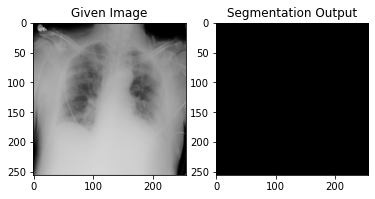

In [6]:
import tensorflow as tf
from tensorflow.keras import layers
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the UNet model
def unet_model(input_size):
    inputs = tf.keras.Input(input_size)

    # Contracting path
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool1)
    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool2)
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool3)
    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv4)
    drop4 = layers.Dropout(0.5)(conv4)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(drop4)

    # Bottom
    conv5 = layers.Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool4)
    conv5 = layers.Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv5)
    drop5 = layers.Dropout(0.5)(conv5)

    # Expansive path
    up6 = layers.Conv2D(512, 2, activation='relu', padding='same', kernel_initializer='he_normal')(layers.UpSampling2D(size=(2, 2))(drop5))
    merge6 = layers.concatenate([drop4, up6], axis=3)
    conv6 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge6)
    conv6 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv6)

    up7 = layers.Conv2D(256, 2, activation='relu', padding='same', kernel_initializer='he_normal')(layers.UpSampling2D(size=(2, 2))(conv6))
    merge7 = layers.concatenate([conv3, up7], axis=3)
    conv7 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge7)
    conv7 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv7)

    up8 = layers.Conv2D(128, 2, activation='relu', padding='same', kernel_initializer='he_normal')(layers.UpSampling2D(size=(2, 2))(conv7))
    merge8 = layers.concatenate([conv2, up8], axis=3)
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge8)
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv8)

    up9 = layers.Conv2D(64, 2, activation='relu', padding='same', kernel_initializer='he_normal')(layers.UpSampling2D(size=(2, 2))(conv8))
    merge9 = layers.concatenate([conv1, up9], axis=3)
    conv9 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge9)
    conv9 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)
    conv9 = layers.Conv2D(2, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)

    # Output
    output = layers.Conv2D(1, 1, activation='sigmoid')(conv9)

    model = tf.keras.Model(inputs=inputs, outputs=output)

    return model

# Load the COVID-19 Radiography Dataset
img = cv2.imread('../Dataset/masked/COVID-19_Radiography_Dataset/Bacterial/images/COVID-1.png')
mask_img = cv2.imread('../Dataset/masked/COVID-19_Radiography_Dataset/Bacterial/masks/COVID-1.png')

# Preprocess the image and the mask
# ...

# Convert the image and the mask to the input format
img = cv2.resize(img, (256, 256))
img = np.expand_dims(img, axis=0)
img = img / 255.0

mask_img = cv2.resize(mask_img, (256, 256))
mask_img = cv2.cvtColor(mask_img, cv2.COLOR_BGR2GRAY)
mask_img = np.expand_dims(mask_img, axis=0)
mask_img = np.expand_dims(mask_img, axis=3)
mask_img = mask_img / 255.0

# Define the model
model = unet_model(input_size=(256, 256, 3))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mask = np.zeros((1, 256, 256, 1))
# Train the model
model.fit(x=img, y=mask_img, batch_size=1, epochs=5)

# Make the segmentation
segmentation = model.predict(img)

# Visualize the segmentation
plt.subplot(1, 2, 1)
plt.imshow(img[0])
plt.title('Given Image')

plt.subplot(1, 2, 2)
plt.imshow(segmentation[0, :, :, 0], cmap='gray')
plt.title('Segmentation Output')

plt.show()


Train on 1 samples
Epoch 1/5
1/1 [==============================] - 5s 5s/sample - loss: 0.6703 - accuracy: 0.7216
Epoch 2/5
1/1 [==============================] - 4s 4s/sample - loss: 951.2333 - accuracy: 0.7656
Epoch 3/5
1/1 [==============================] - 4s 4s/sample - loss: 0.5355 - accuracy: 0.7656
Epoch 4/5
1/1 [==============================] - 5s 5s/sample - loss: 0.5399 - accuracy: 0.7656
Epoch 5/5
1/1 [==============================] - 5s 5s/sample - loss: 0.5322 - accuracy: 0.7656


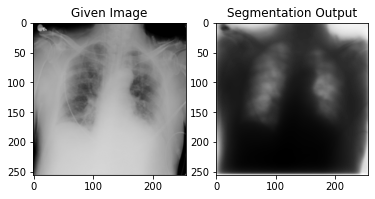

In [11]:
import tensorflow

import tensorflow as tf
tf.compat.v1.disable_eager_execution()
#from tensorflow.keras import tf.keras.layers
import cv2
import numpy as np
import matplotlib.pyplot as plt
import keras.layers
#from tensorflow.python.framework import type_spec_registry
# Define the UNet model
def unet_model(input_size):
    inputs = tf.keras.Input(input_size)

    # Contracting path
    conv1 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    conv1 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv1)
    pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool1)
    conv2 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv2)
    pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool2)
    conv3 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv3)
    pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool3)
    conv4 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv4)
    drop4 = tf.keras.layers.Dropout(0.5)(conv4)
    pool4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(drop4)

    # Bottom
    conv5 = tf.keras.layers.Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool4)
    conv5 = tf.keras.layers.Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv5)
    drop5 = tf.keras.layers.Dropout(0.5)(conv5)

    # Expansive path
    up6 = tf.keras.layers.Conv2D(512, 2, activation='relu', padding='same', kernel_initializer='he_normal')(tf.keras.layers.UpSampling2D(size=(2, 2))(drop5))
    merge6 = tf.keras.layers.concatenate([drop4, up6], axis=3)
    conv6 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge6)
    conv6 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv6)

    up7 = tf.keras.layers.Conv2D(256, 2, activation='relu', padding='same', kernel_initializer='he_normal')(tf.keras.layers.UpSampling2D(size=(2, 2))(conv6))
    merge7 = tf.keras.layers.concatenate([conv3, up7], axis=3)
    conv7 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge7)
    conv7 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv7)

    up8 = tf.keras.layers.Conv2D(128, 2, activation='relu', padding='same', kernel_initializer='he_normal')(tf.keras.layers.UpSampling2D(size=(2, 2))(conv7))
    merge8 = tf.keras.layers.concatenate([conv2, up8], axis=3)
    conv8 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge8)
    conv8 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv8)

    up9 = tf.keras.layers.Conv2D(64, 2, activation='relu', padding='same', kernel_initializer='he_normal')(tf.keras.layers.UpSampling2D(size=(2, 2))(conv8))
    merge9 = tf.keras.layers.concatenate([conv1, up9], axis=3)
    conv9 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge9)
    conv9 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)
    conv9 = tf.keras.layers.Conv2D(2, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)

    # Output
    output = tf.keras.layers.Conv2D(1, 1, activation='sigmoid')(conv9)

    model = tf.keras.Model(inputs=inputs, outputs=output)

    return model

# Load the COVID-19 Radiography Dataset
img = cv2.imread('../Dataset/CellData/chest_xray/val/COVID')
mask_img = cv2.imread('../Dataset/masked/COVID-19_Radiography_Dataset/Bacterial/masks/COVID-1.png')

# Preprocess the image and the mask
# ...

# Convert the image and the mask to the input format
img = cv2.resize(img, (256, 256))
img = np.expand_dims(img, axis=0)
img = img / 255.0

mask_img = cv2.resize(mask_img, (256, 256))
mask_img = cv2.cvtColor(mask_img, cv2.COLOR_BGR2GRAY)
mask_img = np.expand_dims(mask_img, axis=0)
mask_img = np.expand_dims(mask_img, axis=3)
mask_img = mask_img / 255.0

# Define the model
model = unet_model(input_size=(256, 256, 3))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mask = np.zeros((1, 256, 256, 1))
# Train the model
model.fit(x=img, y=mask_img, batch_size=1, epochs=5)

# Make the segmentation
segmentation = model.predict(img)

# Visualize the segmentation
plt.subplot(1, 2, 1)
plt.imshow(img[0])
plt.title('Given Image')

plt.subplot(1, 2, 2)
plt.imshow(segmentation[0, :, :, 0], cmap='gray')
plt.title('Segmentation Output')

plt.show()


In [2]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


# Define the UNet model
def unet_model(input_size):
    inputs = tf.keras.Input(input_size)

    # Contracting path
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool1)
    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool2)
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool3)
    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv4)
    drop4 = layers.Dropout(0.5)(conv4)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(drop4)

    # Bottom
    conv5 = layers.Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool4)
    conv5 = layers.Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv5)
    drop5 = layers.Dropout(0.5)(conv5)

    # Expansive path
    up6 = layers.Conv2D(512, 2, activation='relu', padding='same', kernel_initializer='he_normal')(layers.UpSampling2D(size=(2, 2))(drop5))
    merge6 = layers.concatenate([drop4, up6], axis=3)
    conv6 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge6)
    conv6 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv6)

    up7 = layers.Conv2D(256, 2, activation='relu', padding='same', kernel_initializer='he_normal')(layers.UpSampling2D(size=(2, 2))(conv6))
    merge7 = layers.concatenate([conv3, up7], axis=3)
    conv7 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge7)
    conv7 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv7)

    up8 = layers.Conv2D(128, 2, activation='relu', padding='same', kernel_initializer='he_normal')(layers.UpSampling2D(size=(2, 2))(conv7))
    merge8 = layers.concatenate([conv2, up8], axis=3)
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge8)
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv8)

    up9 = layers.Conv2D(64, 2, activation='relu', padding='same', kernel_initializer='he_normal')(layers.UpSampling2D(size=(2, 2))(conv8))
    merge9 = layers.concatenate([conv1, up9], axis=3)
    conv9 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge9)
    conv9 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)
    conv9 = layers.Conv2D(2, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)

    # Output
    output = layers.Conv2D(1, 1, activation='sigmoid')(conv9)

    model = tf.keras.Model(inputs=inputs, outputs=output)

    return model



In [16]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the sample CXR image and the corresponding mask
img = cv2.imread('/rp_implementation/DATASETS/COVID-19_Radiography_Dataset/COVID/i_s/COVID-1.png', cv2.IMREAD_GRAYSCALE)
mask = cv2.imread('/rp_implementation/DATASETS/COVID-19_Radiography_Dataset/COVID/m_s/COVID-1.png', cv2.IMREAD_GRAYSCALE)

# Preprocess the image and the mask
img = cv2.resize(img, (256, 256))
img = np.expand_dims(img, axis=-1)
img = img / 255.0

mask = cv2.resize(mask, (256, 256))
mask = np.expand_dims(mask, axis=-1)
mask = mask / 255.0


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x=img, y=mask, batch_size=1, epochs=10)

# Make the segmentation
segmentation = model.predict(img)

# Visualize the results
plt.subplot(1, 3, 1)
plt.imshow(img.squeeze(), cmap='gray')
plt.title('Given CXR Image')

plt.subplot(1, 3, 2)
plt.imshow(mask.squeeze(), cmap='gray')
plt.title('Given Mask')

plt.subplot(1, 3, 3)
plt.imshow(segmentation.squeeze(), cmap='gray')
plt.title('Segmentation Output')

plt.show()


Epoch 1/10


ValueError: in user code:

    File "c:\Users\subasini\anaconda3\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\subasini\anaconda3\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\subasini\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\subasini\anaconda3\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\subasini\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\subasini\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'model_4' (type Functional).
    
    Input 0 of layer "conv2d_99" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (1, 256, 1)
    
    Call arguments received by layer 'model_4' (type Functional):
      • inputs=tf.Tensor(shape=(1, 256, 1), dtype=float32)
      • training=True
      • mask=None


In [18]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import numpy as np
img = np.expand_dims(img, axis=-1)


# Load the sample CXR image and the corresponding mask
# Load the sample CXR image and the corresponding mask
img = cv2.imread('/rp_implementation/DATASETS/COVID-19_Radiography_Dataset/COVID/i_s/COVID-1.png', cv2.IMREAD_GRAYSCALE)
mask = cv2.imread('/rp_implementation/DATASETS/COVID-19_Radiography_Dataset/COVID/m_s/COVID-1.png', cv2.IMREAD_GRAYSCALE)

# Preprocess the image and the mask
img = cv2.resize(img, (256, 256))
img = np.expand_dims(img, axis=-1)
img = img / 255.0

mask = cv2.resize(mask, (256, 256))
mask = np.expand_dims(mask, axis=-1)
mask = mask / 255.0


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x=img, y=mask, batch_size=1, epochs=10)

# Make the segmentation
segmentation = model.predict(img)

# Visualize the results
plt.subplot(1, 3, 1)
plt.imshow(img.squeeze(), cmap='gray')
plt.title('Given CXR Image')

plt.subplot(1, 3, 2)
plt.imshow(mask.squeeze(), cmap='gray')
plt.title('Given Mask')

plt.subplot(1, 3, 3)
plt.imshow(segmentation.squeeze(), cmap='gray')
plt.title('Segmentation Output')

plt.show()


Epoch 1/10


ValueError: in user code:

    File "c:\Users\subasini\anaconda3\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\subasini\anaconda3\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\subasini\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\subasini\anaconda3\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\subasini\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\subasini\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'model_4' (type Functional).
    
    Input 0 of layer "conv2d_99" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (1, 256, 1)
    
    Call arguments received by layer 'model_4' (type Functional):
      • inputs=tf.Tensor(shape=(1, 256, 1), dtype=float32)
      • training=True
      • mask=None
